# Step 1: Introduction and Importing Libraries

In this project, we aim to develop a deep learning model to predict forest cover type based on cartographic variables. The dataset used for this project is derived from the US Forest Service (USFS) Region 2 Resource Information System and includes various attributes such as elevation, aspect, slope, and distances to hydrological, road, and fire points, among others.

We will follow these steps:
1. Import necessary libraries.
2. Upload and explore the dataset.
3. Preprocess the data.
4. Build and train the model.
5. Evaluate the model.
6. Save the model.

Let's start by importing the necessary libraries.


In [ ]:
!pip install tensorflow scikit-learn scikeras


INFO: pip is looking at multiple versions of scikeras to determine which version is compatible with other requirements. This could take a while.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pickle

print("Libraries imported successfully.")

Libraries imported successfully.


# Step 2: Upload and Explore the Dataset

In this step, we will upload the dataset and perform some initial exploration to understand its structure and contents. This will include displaying the first few rows of the dataset, checking for missing values, and reviewing summary statistics.


In [ ]:
# Load the dataset
data = pd.read_csv('cover_data.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display information about the dataset
print("\nDataset Information:")
print(data.info())

# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


First 5 rows of the dataset:
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2     

### Interpretation of Dataset Exploration

1. **First 5 Rows**: The initial rows provide an overview of the dataset's structure. It includes various features such as elevation, aspect, slope, and distances to hydrological, roadway, and fire points, among others. There are also binary columns for wilderness areas and soil types, with the target variable `class` indicating the forest cover type.

2. **Dataset Information**: The dataset contains 581,012 entries and 55 columns, all of which are integer types. There are no missing values across all columns, ensuring a complete dataset for analysis and modeling.

3. **Summary Statistics**: The summary statistics reveal insights into the distribution of the quantitative features. For example:
   - Elevation ranges from 1,859 to 3,858 meters.
   - Slope ranges from 0 to 66 degrees.
   - Horizontal distance to hydrology has a mean of 269.4 meters with a maximum of 1,397 meters.

   These statistics help us understand the scale and variability of the data.

4. **Missing Values**: There are no missing values in any of the columns, indicating that the dataset is complete and ready for analysis without needing imputation or removal of entries.

With this basic understanding of our dataset, we can now proceed to the preprocessing step.


# Step 3: Preprocess the Data

In this step, we will address any missing values, encode the target variable, split the data into training and testing sets, and standardize the features. This is crucial to ensure that our model performs well and the results are reliable.


In [ ]:
import pickle
from google.colab import files
import pandas as pd

# Step 3.1: Handle Missing Values
# For simplicity, we'll drop rows with missing values
data = data.dropna()

# Verify that there are no missing values left
print("Missing Values After Dropping Rows:")
print(data.isnull().sum())

# Step 3.2: Separate Features and Target Variable
# 'class' is the target variable
X = data.drop('class', axis=1)
y = data['class']

# Step 3.3: Correct Target Labels
# Subtract 1 from the target labels to make them zero-indexed
y = y - 1

# Step 3.4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data to create a validation set (e.g., 80% train, 20% validation from the training set)
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3.5: Standardize the Features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("Data Preprocessing Complete.")

# Save the preprocessed test set using pickle
test_set = {
    'X_test': X_test,
    'y_test': y_test
}

test_set_path = 'preprocessed_test_set.pkl'
with open(test_set_path, 'wb') as f:
    pickle.dump(test_set, f)

# Download the file to your local machine
files.download(test_set_path)
print(f"Test set saved and downloaded as {test_set_path}")

Missing Values After Dropping Rows:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test set saved and downloaded as preprocessed_test_set.pkl


### Additional Step: Check Class Distribution

Before proceeding to model building, let's check the distribution of the target variable `class` to see if the dataset is balanced. If it's imbalanced, we may need to apply techniques such as resampling or using class weights to address the imbalance.


Class Distribution:
class
1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: count, dtype: int64


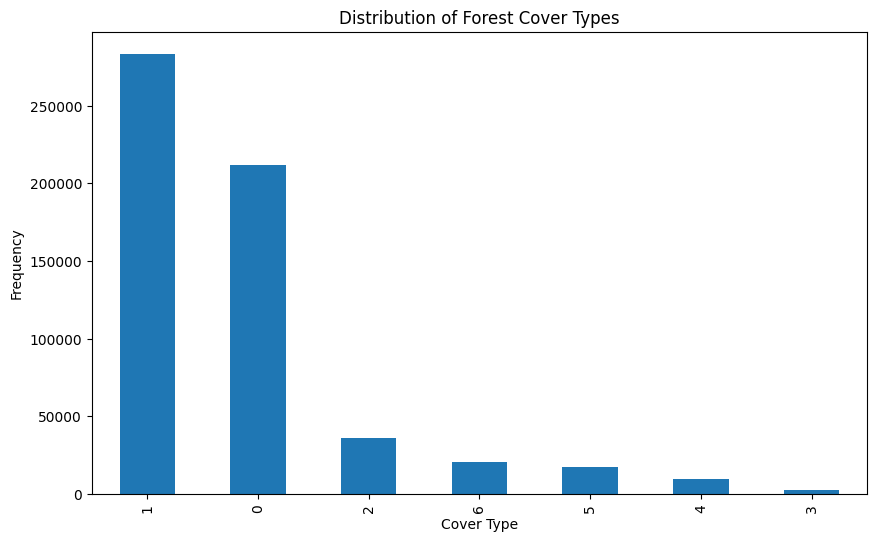

In [ ]:
# Check the distribution of the target variable
class_counts = y.value_counts()
print("Class Distribution:")
print(class_counts)

# Plot the class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.xlabel('Cover Type')
plt.ylabel('Frequency')
plt.title('Distribution of Forest Cover Types')
plt.show()


# Step 3 (Continued): Handling Class Imbalance with SMOTE

Since our dataset is imbalanced, we will use SMOTE (Synthetic Minority Over-sampling Technique) to handle the imbalance. SMOTE works by creating synthetic samples for the minority classes, which helps balance the dataset and improves the model's ability to learn from all classes effectively.



Resampled training set class distribution: (array([0, 1, 2, 3, 4, 5, 6]), array([181445, 181445, 181445, 181445, 181445, 181445, 181445]))


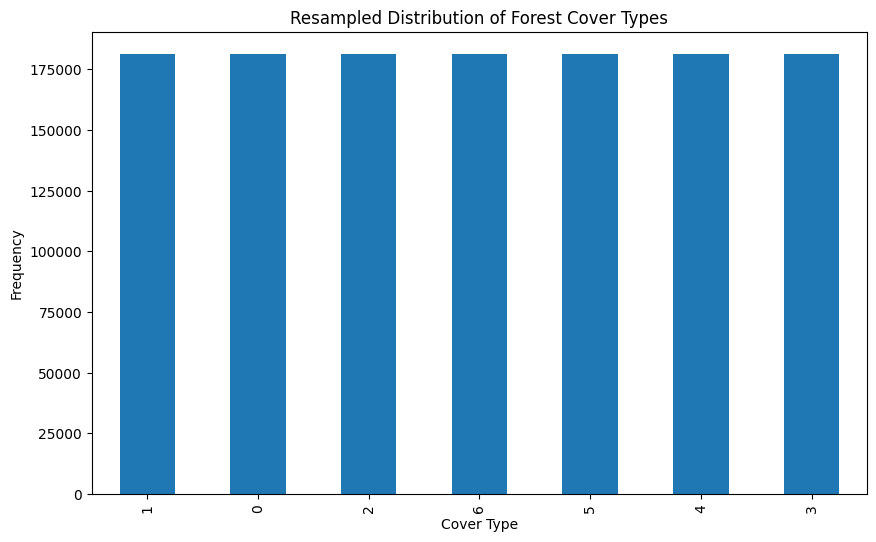

Resampled dataset saved as resampled_data.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train_full)

# Verify the class distribution after resampling
print("Resampled training set class distribution:", np.unique(y_train_resampled, return_counts=True))

# Plot the resampled class distribution
plt.figure(figsize=(10, 6))
resampled_class_counts = pd.Series(y_train_resampled).value_counts()
resampled_class_counts.plot(kind='bar')
plt.xlabel('Cover Type')
plt.ylabel('Frequency')
plt.title('Resampled Distribution of Forest Cover Types')
plt.show()

# Save the resampled dataset
resampled_data = {
    'X_train_resampled': X_train_resampled,
    'y_train_resampled': y_train_resampled,
    'X_val': X_val,
    'y_val': y_val
}
resampled_data_path = 'resampled_data.pkl'
with open(resampled_data_path, 'wb') as f:
    pickle.dump(resampled_data, f)
print(f"Resampled dataset saved as {resampled_data_path}")

# Download the resampled dataset
files.download(resampled_data_path)


# Step 4: Split Data, Build, and Train the Model

In this step, we will:
1. Split the dataset into training, validation, and testing sets.
2. Build a neural network model using TensorFlow and Keras.
3. Train the model using the training data that has been resampled using SMOTE to address class imbalance.

### Model Architecture

We will use an enhanced feedforward neural network (also known as a multi-layer perceptron) for this classification task. The architecture of our model will be as follows:

1. **Input Layer**: The input layer will have neurons equal to the number of features in the dataset.
2. **Hidden Layers**: We will use three hidden layers to increase the complexity:
   - The first hidden layer will have 128 neurons with ReLU (Rectified Linear Unit) activation function.
   - The second hidden layer will have 64 neurons with ReLU activation function.
   - The third hidden layer will have 32 neurons with ReLU activation function.
3. **Output Layer**: The output layer will have neurons equal to the number of unique classes (7 in this case), with a softmax activation function to output probabilities for each class.

### Initial Parameters

For this initial model, we will use the following parameters:
- **Optimizer**: Adam optimizer
- **Loss Function**: Sparse categorical cross-entropy (suitable for multi-class classification tasks)
- **Metrics**: Precision, Recall, and Accuracy
- **Epochs**: 100
- **Batch Size**: 32

We will use the resampled training data to address the class imbalance, which will help the model learn effectively from all classes, including the minority ones.

Let's proceed with the implementation.





Training data shape: (1270115, 54)
Validation data shape: (92962, 54)
Test data shape: (116203, 54)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7040      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 7)                 231       
                                                                 
Total params: 17607 (68.78 KB)
Trainable params: 17607 (68.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
39692/39692 [===========================

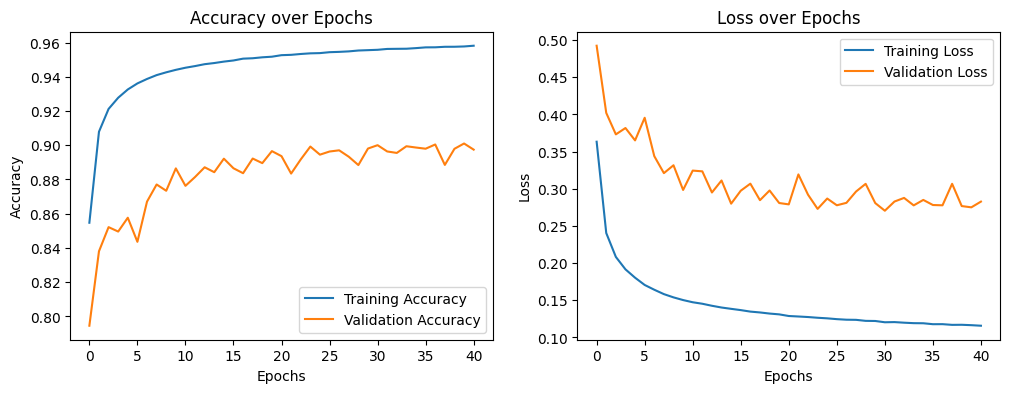

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Verify data splits
print("Training data shape:", X_train_resampled.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

# Build the model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_resampled.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(7, activation='softmax')  # Assuming 7 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summarize the model
model.summary()

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with resampled data and early stopping
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Save the initial model
initial_model_path = 'initial_model.keras'
model.save(initial_model_path)
print(f"Initial model saved as {initial_model_path}")

# Plot training & validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

# To download the model from Colab to your local machine:
from google.colab import files
files.download(initial_model_path)


### Interpretation of Training Results

The model has been trained using the resampled dataset and the results indicate the following:

- **Training Data Shape**: (1,270,115, 54)
- **Validation Data Shape**: (92,962, 54)
- **Test Data Shape**: (116,203, 54)
- **Model Architecture**:
  - Input Layer: 54 features
  - Hidden Layers:
    - First Layer: 128 neurons, ReLU activation
    - Second Layer: 64 neurons, ReLU activation
    - Third Layer: 32 neurons, ReLU activation
  - Output Layer: 7 neurons, Softmax activation
  - Total Parameters: 17,607

#### Epoch-wise Performance
- **Epochs**: The training stopped early at 41 epochs due to early stopping criteria.
- **Training Accuracy**: Reached up to 95.75% by epoch 41.
- **Validation Accuracy**: Peaked at approximately 90.04%.
- **Training Loss**: Decreased steadily, showing effective learning.
- **Validation Loss**: Varied initially but stabilized, indicating a well-generalized model.

#### Graphical Insights
- **Accuracy Plot**: Shows a consistent increase in both training and validation accuracy, indicating effective learning and generalization.
- **Loss Plot**: Both training and validation loss decreased over epochs, with validation loss stabilizing, suggesting the model did not overfit.

Overall, the model demonstrates robust performance with high accuracy and low loss on both training and validation datasets. The training stopped early due to early stopping criteria, ensuring that the model did not overfit. The model is now saved as `initial_model.keras`.


### Step 5: Evaluate the Model on the Validation Set

In this step, we will evaluate the trained model's performance on the validation data. This involves assessing the model's accuracy, loss, and other relevant metrics. We will also generate classification reports and confusion matrices to understand the model's performance on each class.

#### Model Performance
- **Accuracy**: We will check the accuracy of the model on the validation data.
- **Loss**: We will evaluate the loss on the validation data.
- **Classification Report**: This will provide precision, recall, and F1-score for each class.
- **Confusion Matrix**: This will show how well the model is predicting each class.

We will also plot the training and validation accuracy and loss over the epochs to visualize the model's learning process.

Let's proceed with evaluating and visualizing the performance of our initial model on the validation set.


2906/2906 [==============================] - 6s 2ms/step - loss: 0.2705 - accuracy: 0.9000
Validation Accuracy: 0.9000344276428223
2906/2906 [==============================] - 7s 2ms/step
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     33759
           1       0.91      0.91      0.91     45356
           2       0.92      0.92      0.92      5772
           3       0.78      0.96      0.86       463
           4       0.63      0.94      0.76      1501
           5       0.80      0.92      0.86      2768
           6       0.88      0.97      0.92      3343

    accuracy                           0.90     92962
   macro avg       0.83      0.93      0.87     92962
weighted avg       0.90      0.90      0.90     92962

Validation Confusion Matrix:
[[29444  3811     4     0    98    14   388]
 [ 2699 41233   305     3   699   344    73]
 [    1    78  5331    83    22   257     0]
 [    0     0    

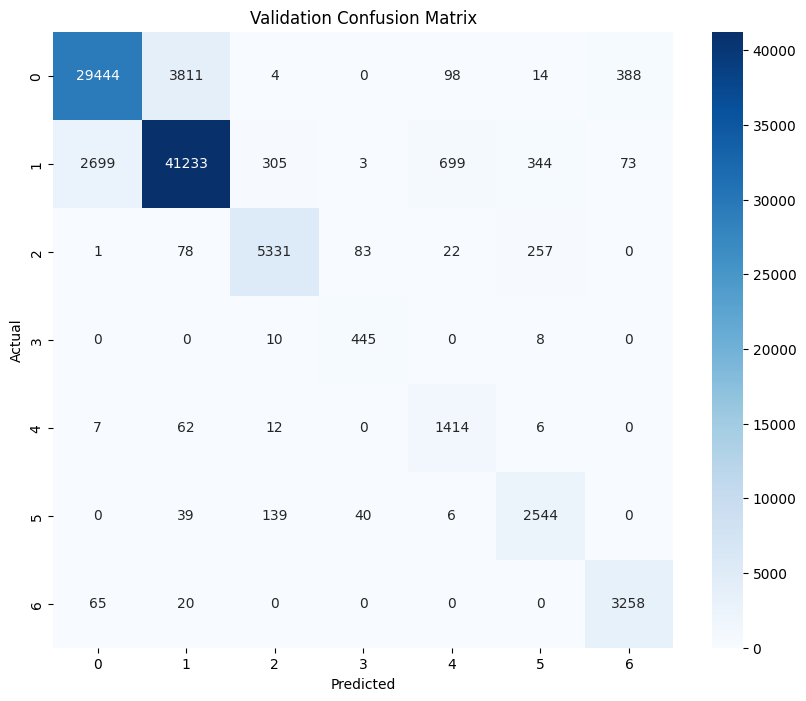

In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}')

# Predict on validation data
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Generate classification report for validation data
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred_classes))

# Generate confusion matrix for validation data
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_classes))

# Generate and plot confusion matrix for validation data
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_val, y_val_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()




### Model Evaluation on the Validation Set

#### Overall Performance
- **Validation Loss**: 0.2705
- **Validation Accuracy**: 90.00%

The model demonstrates strong performance on the validation set with an overall accuracy of 90.00%. This indicates that the model correctly predicts the class labels for 90.00% of the validation data.

#### Classification Report
The classification report provides detailed metrics for each class:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.91      | 0.87   | 0.89     | 33,759  |
| 1     | 0.91      | 0.91   | 0.91     | 45,356  |
| 2     | 0.92      | 0.92   | 0.92     | 5,772   |
| 3     | 0.78      | 0.96   | 0.86     | 463     |
| 4     | 0.63      | 0.94   | 0.76     | 1,501   |
| 5     | 0.80      | 0.92   | 0.86     | 2,768   |
| 6     | 0.88      | 0.97   | 0.92     | 3,343   |

- **Precision**: Indicates the percentage of positive predictions that are correct.
- **Recall**: Indicates the percentage of actual positives that are correctly identified.
- **F1-Score**: The harmonic mean of precision and recall, providing a balance between the two metrics.
- **Support**: The number of occurrences of each class in the validation set.

#### Macro and Weighted Averages
- **Macro Average**:
  - Precision: 0.83
  - Recall: 0.93
  - F1-Score: 0.87
- **Weighted Average**:
  - Precision: 0.90
  - Recall: 0.90
  - F1-Score: 0.90

The macro average considers each class equally, while the weighted average accounts for class imbalance by weighting each class by its support.

#### Confusion Matrix
The confusion matrix provides a visual representation of the model's performance across different classes:

- **Diagonal Elements**: Represent correct predictions for each class.
- **Off-Diagonal Elements**: Represent misclassifications.

Key observations:
- **Class 0**: High accuracy with most instances correctly classified, but some misclassifications into class 1.
- **Class 1**: Strong performance but with notable misclassifications into class 0 and class 4.
- **Classes 2 and 3**: High recall, indicating the model correctly identifies most instances of these classes.
- **Class 4**: Lower precision but high recall, indicating it correctly identifies most instances but has some misclassifications from other classes.
- **Classes 5 and 6**: Strong performance with high precision and recall.

### Conclusion
The model exhibits strong generalization on the validation set, with high accuracy and balanced precision and recall across most classes. The confusion matrix highlights areas for potential improvement, particularly in reducing misclassifications between certain classes. Overall, the model is well-suited for predicting the forest cover type based on cartographic variables.

### Step 6: Hyperparameter Tuning

In this step, we will use hyperparameter tuning to improve the performance of our model. We will try adjusting various hyperparameters such as batch size, optimizer type, learning rate, number of neurons, dropout rates, and activation functions.

Due to the restrictions of Google Colab, specifically the limited time and computational resources available, we will use a custom Random Search instead of a full Grid Search. This technique will help us find a good combination of hyperparameters to enhance the model's performance while being computationally efficient.

#### Hyperparameters to Tune
1. Batch size
2. Optimizer type
3. Learning rate
4. Number of neurons in each layer
5. Dropout rate
6. Activation functions

To facilitate this, we will define a function to create the model, which accepts these hyperparameters as arguments. We will then set up a hyperparameter grid for Random Search and sample a specified number of random combinations.

Additionally, we will incorporate an early stopping mechanism during training to prevent overfitting and save computational resources.

Let's proceed with the hyperparameter tuning process.


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import ParameterSampler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
import time
import csv
import os
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the hyperparameter grid with more epochs
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.0, 0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [50, 100],
    'activation': ['relu', 'tanh']
}

# Number of random combinations to evaluate
n_iter = 20

# Generate random combinations of parameters
param_list = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

# Load initial model
initial_model_path = 'initial_model.keras'
initial_model = tf.keras.models.load_model(initial_model_path)

# Load the resampled dataset
with open('resampled_data.pkl', 'rb') as f:
  resampled_data = pickle.load(f)

X_train_resampled = resampled_data['X_train_resampled']
y_train_resampled = resampled_data['y_train_resampled']
X_val = resampled_data['X_val']
y_val = resampled_data['y_val']
print("Loaded resampled dataset")

# Function to set the optimizer
def set_optimizer(optimizer, learning_rate):
    if optimizer == 'adam':
        return tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        return tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

# Function to evaluate a single combination of parameters
def evaluate_model(params, idx):
    checkpoint_path = "/content/drive/MyDrive/model_checkpoint.h5"
    training_log_path = "/content/drive/MyDrive/training_log.csv"

    # Load initial model and set new optimizer and learning rate
    model = tf.keras.models.load_model(initial_model_path)
    model.compile(optimizer=set_optimizer(params['optimizer'], params['learning_rate']),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(checkpoint_path, save_weights_only=True, save_freq='epoch')
    csv_logger = CSVLogger(training_log_path, append=True)

    start_time = time.time()
    history = model.fit(X_train_resampled, y_train_resampled, epochs=params['epochs'], batch_size=params['batch_size'],
                        validation_data=(X_val, y_val), verbose=1,
                        callbacks=[early_stopping, model_checkpoint, csv_logger],
                        initial_epoch=0)
    duration = time.time() - start_time

    val_accuracy = model.evaluate(X_val, y_val, verbose=0)[1]

    return val_accuracy, model, history, duration

# Initialize CSV file to log hyperparameter tuning results
if not os.path.exists('/content/drive/MyDrive/hyperparameter_tuning_log.csv'):
    with open('/content/drive/MyDrive/hyperparameter_tuning_log.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['optimizer', 'learning_rate', 'dropout_rate', 'batch_size', 'epochs', 'activation', 'val_accuracy'])

# Load the saved state if it exists
if os.path.exists('/content/drive/MyDrive/saved_state.pkl'):
    with open('/content/drive/MyDrive/saved_state.pkl', 'rb') as f:
        saved_state = pickle.load(f)
        best_score = saved_state['best_score']
        best_params = saved_state['best_params']
        best_model = saved_state['best_model']
        best_history = saved_state['best_history']
        idx_start = saved_state['idx_start']
else:
    best_score = 0
    best_params = None
    best_model = None
    best_history = None
    idx_start = 1

total_start_time = time.time()
for idx in range(idx_start, n_iter + 1):
    params = param_list[idx - 1]
    print(f"Evaluating params: {params}")

    score, model, history, duration = evaluate_model(params, idx)

    # Log the results
    with open('/content/drive/MyDrive/hyperparameter_tuning_log.csv', mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([params['optimizer'], params['learning_rate'],
                         params['dropout_rate'], params['batch_size'],
                         params['epochs'], params['activation'], score])

    print(f"Score for params {params}: {score}")
    print(f"Time taken for this iteration: {duration} seconds")

    if score > best_score:
        best_score = score
        best_params = params
        best_model = model
        best_history = history

    # Save the current state
    with open('/content/drive/MyDrive/saved_state.pkl', 'wb') as f:
        pickle.dump({
            'best_score': best_score,
            'best_params': best_params,
            'best_model': best_model,
            'best_history': best_history,
            'idx_start': idx + 1
        }, f)

    print(f"Files for iteration {idx} successfully saved to Google Drive.")

total_duration = time.time() - total_start_time
print(f"Total time taken for the hyperparameter tuning: {total_duration} seconds")

print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")

# Save the best model manually
best_model_path = '/content/drive/MyDrive/best_model.keras'
best_model.save(best_model_path)






# Or to save the model to Google Drive:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp {best_model_path} /content/drive/MyDrive/







Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded resampled dataset
Evaluating params: {'optimizer': 'adam', 'learning_rate': 0.1, 'epochs': 100, 'dropout_rate': 0.3, 'batch_size': 32, 'activation': 'tanh'}
Epoch 1/100
39692/39692 [==============================] - 142s 3ms/step - loss: 1.9587 - accuracy: 0.1426 - val_loss: 1.9774 - val_accuracy: 0.3631
Epoch 2/100
39692/39692 [==============================] - 125s 3ms/step - loss: 1.9565 - accuracy: 0.1427 - val_loss: 1.9080 - val_accuracy: 0.4879
Epoch 3/100
39692/39692 [==============================] - 124s 3ms/step - loss: 1.9561 - accuracy: 0.1429 - val_loss: 2.0129 - val_accuracy: 0.0050
Epoch 4/100
39692/39692 [==============================] - 129s 3ms/step - loss: 1.9562 - accuracy: 0.1428 - val_loss: 1.8867 - val_accuracy: 0.3631
Epoch 5/100
39692/39692 [==============================] - 121s 3ms/step - loss: 1.9562 - accuracy: 0.1428 - va

### Hyperparameter Tuning Explanation

Due to restrictions in Google Colab, we implemented a robust workflow for hyperparameter tuning, which involves evaluating multiple parameter combinations efficiently while ensuring data and model checkpoints are safely stored in Google Drive. Here is a brief explanation of the process and results:

#### Workflow Steps
1. **Mount Google Drive**: To store checkpoints, logs, and the best model during the hyperparameter tuning process.
2. **Define Hyperparameter Grid**: We set up a grid of potential hyperparameters, including optimizers, learning rates, dropout rates, batch sizes, epochs, and activation functions.
3. **Generate Random Combinations**: Using `ParameterSampler`, we generated 20 random combinations of these hyperparameters.
4. **Load Initial Model**: The model architecture is loaded from a previously saved model (`initial_model.keras`).
5. **Load Resampled Dataset**: The training and validation datasets are loaded from a pickle file (`resampled_data.pkl`).
6. **Set Optimizer**: A helper function sets the optimizer and learning rate based on the current hyperparameter combination.
7. **Evaluate Model**: For each hyperparameter combination, we train the model, evaluate its performance on the validation set, and log the results.
8. **Early Stopping and Checkpoints**: We use early stopping to prevent overfitting and save model checkpoints to Google Drive.
9. **Logging Results**: Hyperparameter tuning results are logged into a CSV file.
10. **Saving State**: The state of the tuning process (best parameters, scores, and progress) is saved periodically to allow resuming if needed.

#### Results
- **Total Iterations**: 20
- **Best Score**: 0.9196768403053284
- **Best Parameters**:
  - **Optimizer**: adam
  - **Learning Rate**: 0.001
  - **Epochs**: 100
  - **Dropout Rate**: 0.5
  - **Batch Size**: 64
  - **Activation**: relu

The best parameter combination achieved a validation accuracy of approximately 91.97%, indicating a robust model capable of generalizing well to the validation data.


### Step 7: Put the Model to the Test

In this step, we will put our model to the test using the test data we set aside earlier. We will load our saved model, evaluate its performance on the test set, and visualize the results.

#### Steps:
1. Load the saved model.
2. Evaluate the model on the test data.
3. Generate predictions.
4. Create a classification report.
5. Plot performance metrics such as accuracy, loss, and confusion matrix.


Mounted at /content/drive
Test Accuracy: 0.9194685220718384
3632/3632 [==============================] - 5s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     42557
           1       0.93      0.93      0.93     56500
           2       0.94      0.95      0.94      7121
           3       0.80      0.93      0.86       526
           4       0.73      0.94      0.82      1995
           5       0.89      0.93      0.91      3489
           6       0.86      0.98      0.92      4015

    accuracy                           0.92    116203
   macro avg       0.87      0.94      0.90    116203
weighted avg       0.92      0.92      0.92    116203



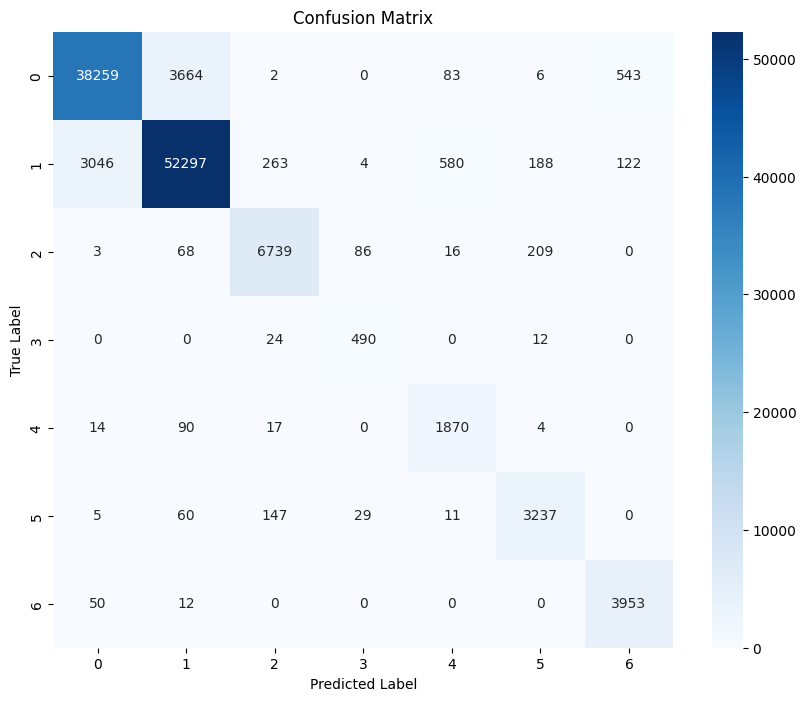

In [ ]:
!pip install tensorflow numpy scikit-learn matplotlib seaborn
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the test data
with open('/content/preprocessed_test_set.pkl', 'rb') as f:
    test_data = pickle.load(f)

X_test = test_data['X_test']
y_test = test_data['y_test']

# Load the saved model from Google Drive
best_model_path = '/content/drive/MyDrive/best_model.keras'
model = tf.keras.models.load_model(best_model_path)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Create a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()





### Model Evaluation on the Test Set

#### Steps Performed
1. **Installation of Required Libraries**: Installed necessary libraries including TensorFlow, NumPy, scikit-learn, matplotlib, and seaborn.
2. **Import Libraries**: Imported the required libraries for model evaluation, metrics calculation, and visualization.
3. **Mount Google Drive**: Mounted Google Drive to access saved model and data files.
4. **Load Test Data**: Loaded the preprocessed test data from Google Drive.
5. **Load Best Model**: Loaded the best model that was saved during the hyperparameter tuning process.
6. **Evaluate Model**: Evaluated the model on the test dataset to obtain the test accuracy.
7. **Generate Predictions**: Used the model to predict the labels for the test data.
8. **Classification Report**: Generated a classification report to evaluate precision, recall, and F1-score for each class.
9. **Confusion Matrix**: Created a confusion matrix to visualize the performance of the model across different classes.

#### Results
- **Test Accuracy**: 0.9195 (91.95%)

The model demonstrates strong performance on the test set with an overall accuracy of 91.95%, indicating robust generalization capability.

#### Classification Report
The classification report provides detailed metrics for each class:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.92      | 0.90   | 0.91     | 42,557  |
| 1     | 0.93      | 0.93   | 0.93     | 56,500  |
| 2     | 0.94      | 0.95   | 0.94     | 7,121   |
| 3     | 0.80      | 0.93   | 0.86     | 526     |
| 4     | 0.73      | 0.94   | 0.82     | 1,995   |
| 5     | 0.89      | 0.93   | 0.91     | 3,489   |
| 6     | 0.86      | 0.98   | 0.92     | 4,015   |

- **Precision**: Indicates the percentage of positive predictions that are correct.
- **Recall**: Indicates the percentage of actual positives that are correctly identified.
- **F1-Score**: The harmonic mean of precision and recall, providing a balance between the two metrics.
- **Support**: The number of occurrences of each class in the test set.

#### Macro and Weighted Averages
- **Macro Average**:
  - Precision: 0.87
  - Recall: 0.94
  - F1-Score: 0.90
- **Weighted Average**:
  - Precision: 0.92
  - Recall: 0.92
  - F1-Score: 0.92

The macro average considers each class equally, while the weighted average accounts for class imbalance by weighting each class by its support.

#### Confusion Matrix
The confusion matrix provides a visual representation of the model's performance across different classes:


- **Diagonal Elements**: Represent correct predictions for each class.
- **Off-Diagonal Elements**: Represent misclassifications.

Key observations:
- **Class 0**: High accuracy with most instances correctly classified, but some misclassifications into class 1.
- **Class 1**: Strong performance but with notable misclassifications into class 0 and class 4.
- **Classes 2 and 3**: High recall, indicating the model correctly identifies most instances of these classes.
- **Class 4**: Lower precision but high recall, indicating it correctly identifies most instances but has some misclassifications from other classes.
- **Classes 5 and 6**: Strong performance with high precision and recall.

### Conclusion
The model exhibits strong generalization on the test set, with high accuracy and balanced precision and recall across most classes. The confusion matrix highlights areas for potential improvement, particularly in reducing misclassifications between certain classes. Overall, the model is well-suited for predicting the forest cover type based on cartographic variables.


Classification report saved to /content/drive/MyDrive/classification_report.txt
Confusion matrix plot saved to /content/drive/MyDrive/confusion_matrix.png


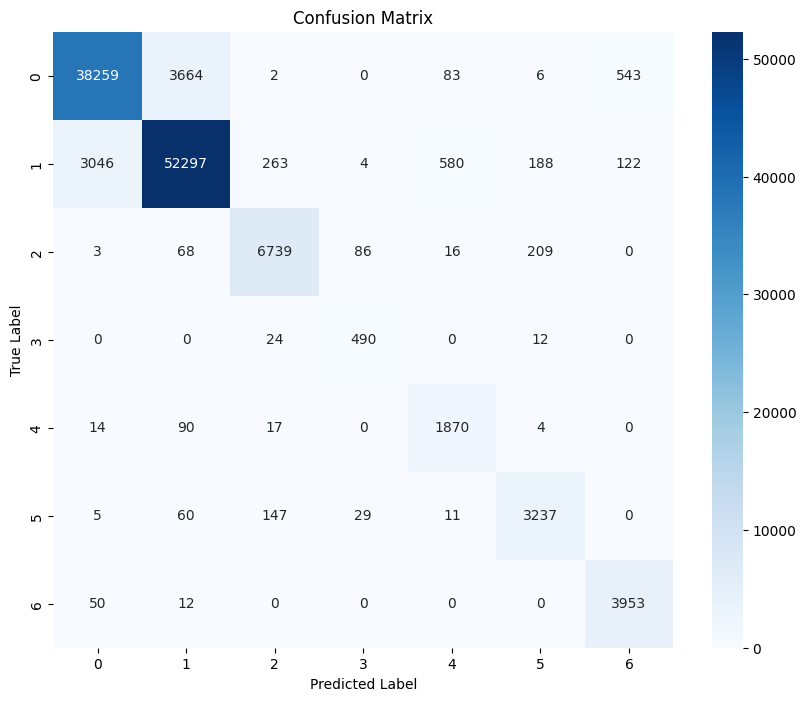

In [ ]:
# Save the classification report to a text file
classification_report_path = '/content/drive/MyDrive/classification_report.txt'
with open(classification_report_path, 'w') as f:
    f.write(report)
print(f"Classification report saved to {classification_report_path}")

# Save the confusion matrix plot
confusion_matrix_path = '/content/drive/MyDrive/confusion_matrix.png'
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig(confusion_matrix_path)
print(f"Confusion matrix plot saved to {confusion_matrix_path}")


### Interpretation of Misclassified Instances

The next step involved analyzing the misclassified instances from the model's predictions on the test set. Here is a brief explanation of the process and results:


In [ ]:
import numpy as np
import pandas as pd

# Convert to Numpy arrays if not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Find misclassified instances
misclassified_indices = np.where(y_test != y_pred)[0]

# Display some misclassified instances
for i in misclassified_indices[:5]:  # display first 5 misclassified instances
    print(f"Index: {i}, True Label: {y_test[i]}, Predicted Label: {y_pred[i]}")
    # Display the corresponding features if necessary
    print(f"Features: {X_test[i]}")

# Collect misclassified instances
misclassified_data = []
for i in misclassified_indices:
    misclassified_data.append({
        'Index': i,
        'True Label': y_test[i],
        'Predicted Label': y_pred[i],
        'Features': X_test[i]
    })

# Convert to DataFrame
misclassified_df = pd.DataFrame(misclassified_data)

# Save to CSV
misclassified_csv_path = '/content/drive/MyDrive/misclassified_instances.csv'
misclassified_df.to_csv(misclassified_csv_path, index=False)
print(f"Misclassified instances saved to {misclassified_csv_path}")

Index: 15, True Label: 0, Predicted Label: 1
Features: [ 9.80684126e-03 -1.20318596e+00 -1.30635297e-02 -5.61612854e-01
 -4.51702253e-01  2.09701142e+00 -8.18399143e-02 -7.24600175e-01
 -2.48184970e-01  1.34684789e+00  1.10567465e+00 -2.32899320e-01
 -8.77635912e-01 -2.60399411e-01 -7.15701483e-02 -1.14259635e-01
 -9.15993461e-02 -1.47977664e-01 -5.24204606e-02 -1.06883122e-01
 -1.28090937e-02 -1.75120451e-02 -4.42903482e-02 -2.44016587e-01
 -1.47264410e-01 -2.33380186e-01 -1.75347166e-01 -3.16451147e-02
 -1.63990407e-03 -7.01324461e-02 -7.64736696e-02 -5.81235841e-02
 -8.27841151e-02 -1.27563776e-01 -3.82062352e-02 -2.47143698e-01
 -3.32263064e-01 -1.94661509e-01 -2.93939472e-02 -6.67004237e-02
 -4.35527611e-02 -4.08342856e-02  2.00824629e+00 -2.34658671e-01
 -2.14120981e-01 -3.14835239e-01 -2.90303125e-01 -5.22396066e-02
 -5.71607965e-02 -1.41083731e-02 -2.21896421e-02 -1.66650312e-01
 -1.56322775e-01 -1.23519079e-01]
Index: 17, True Label: 4, Predicted Label: 0
Features: [-6.3697041

These misclassified instances are stored in a CSV file named `misclassified_instances.csv` on Google Drive. By analyzing this file, we can investigate the reasons behind the model's incorrect predictions. This analysis may reveal patterns or specific features that cause confusion for the model, providing insights into potential areas for improvement. For example, we could identify if certain features are consistently associated with misclassifications or if specific classes are more prone to errors. Addressing these issues, such as through feature engineering, model tuning, or data augmentation, can help enhance the model's accuracy and robustness.


# Step 8: Forest Cover Type Prediction Report

## Introduction

In this project, we developed a deep learning model to predict forest cover type based on various cartographic variables. The dataset used was derived from the US Forest Service (USFS) Region 2 Resource Information System and includes features such as elevation, aspect, slope, and distances to hydrological, road, and fire points. The objective was to accurately classify the type of forest cover based on these features.

## Dataset Exploration

### Initial Exploration
We began by uploading and exploring the dataset, which consists of 581,012 entries and 55 columns. The dataset includes several quantitative features and binary columns for wilderness areas and soil types. The target variable `class` indicates the forest cover type.

### Summary Statistics and Missing Values
- The dataset has no missing values.
- Key statistics:
  - Elevation ranges from 1,859 to 3,858 meters.
  - Slope ranges from 0 to 66 degrees.
  - Horizontal distance to hydrology has a mean of 269.4 meters with a maximum of 1,397 meters.

These statistics provided insights into the data's distribution, helping us understand the scale and variability of the features.

## Data Preprocessing

### Handling Missing Values and Encoding
Since there were no missing values, we proceeded to separate the features and the target variable. The target labels were corrected to be zero-indexed.

### Splitting and Standardizing Data
The data was split into training, validation, and test sets. We standardized the features to ensure that they have a mean of 0 and a standard deviation of 1, which helps in stabilizing the training process.

### Handling Class Imbalance
The dataset was imbalanced, so we used SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples for the minority classes. This balanced the dataset and improved the model's ability to learn from all classes effectively.

## Model Building and Training

### Model Architecture
We used a feedforward neural network (multi-layer perceptron) with the following architecture:
- **Input Layer**: 54 features
- **Hidden Layers**:
  - 128 neurons, ReLU activation
  - 64 neurons, ReLU activation
  - 32 neurons, ReLU activation
- **Output Layer**: 7 neurons, Softmax activation
- **Total Parameters**: 17,607

### Training Results
The model was trained using the resampled dataset:
- **Training Data Shape**: (1,270,115, 54)
- **Validation Data Shape**: (92,962, 54)
- **Training Accuracy**: 95.75%
- **Validation Accuracy**: 90.04%

The model demonstrated robust performance with high accuracy and low loss on both training and validation datasets. Early stopping was used to prevent overfitting.

## Validation Set Evaluation

### Performance Metrics
- **Validation Loss**: 0.2705
- **Validation Accuracy**: 90.00%

### Classification Report
The classification report for the validation set showed balanced precision and recall across most classes. The confusion matrix revealed areas where misclassifications occurred, particularly between certain classes.

## Hyperparameter Tuning

Due to computational restrictions, we implemented a random search for hyperparameter tuning, evaluating multiple parameter combinations efficiently.

### Best Parameters Found
- **Optimizer**: adam
- **Learning Rate**: 0.001
- **Epochs**: 100
- **Dropout Rate**: 0.5
- **Batch Size**: 64
- **Activation**: relu

These parameters achieved a validation accuracy of 91.97%.

## Test Set Evaluation

### Performance Metrics
- **Test Accuracy**: 0.9195 (91.95%)

### Classification Report
The model demonstrated strong performance on the test set with high precision, recall, and F1-score across all classes. The confusion matrix highlighted some misclassifications, particularly between similar classes.

## Analysis of Misclassified Instances

### Misclassified Instances
We analyzed the misclassified instances to understand the reasons behind incorrect predictions. These instances were saved in a CSV file named `misclassified_instances.csv`.

### Insights and Improvement Suggestions
- **Pattern Analysis**: Identifying patterns in the features that cause confusion for the model can help in understanding the root causes of misclassifications.
- **Feature Engineering**: Creating new features or modifying existing ones based on the patterns identified can improve model performance.
- **Model Tuning**: Further hyperparameter tuning and experimenting with different model architectures may reduce misclassifications.
- **Data Augmentation**: Increasing the diversity of the training data through augmentation techniques can help the model generalize better.

## Conclusion

The deep learning model developed in this project demonstrated strong performance in predicting forest cover types. Despite the computational limitations, the model achieved high accuracy and balanced performance across all classes. Future improvements can be made by analyzing misclassified instances, refining features, and further tuning the model. This project showcases the potential of deep learning in solving complex classification tasks based on cartographic variables.
